In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Digits Dataset
digits = load_digits()
X = digits.data
y = digits.target

# Display dataset information
print("Dataset Shape:", X.shape)
print("Number of Classes:", len(np.unique(y)))
print("Classes:", np.unique(y))

Dataset Shape: (1797, 64)
Number of Classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


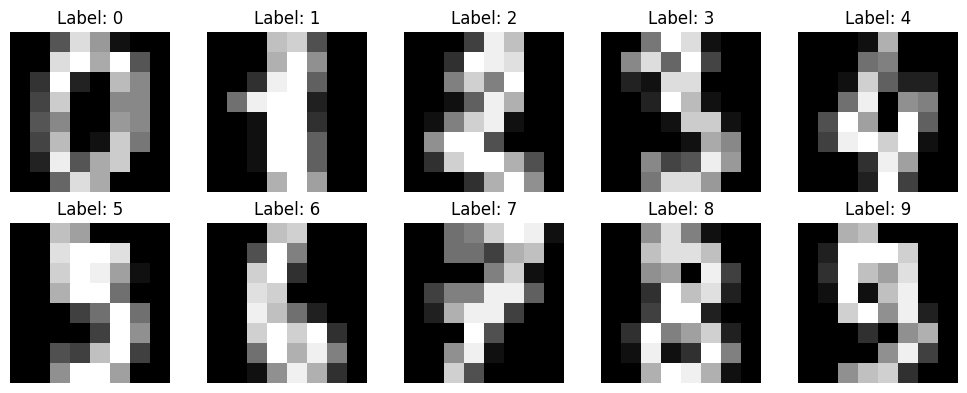

In [7]:
# visualize the first 10 images
def plot_digits(images, labels):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_digits(X, y)

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Display the shape of the reduced data
print("t-SNE Output Shape:", X_tsne.shape)

/home/astane/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE Output Shape: (1797, 2)


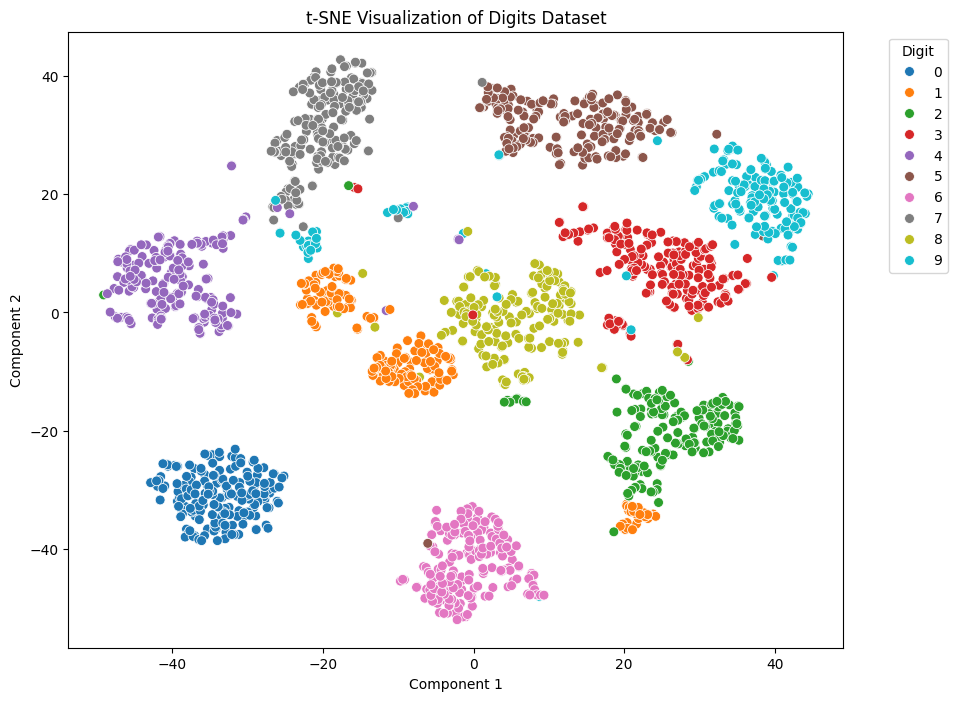

In [8]:
# Create a DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=["Component 1", "Component 2"])
tsne_df["Label"] = y

# Plot the t-SNE output
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="Component 1", y="Component 2", hue="Label", palette="tab10", data=tsne_df, s=50
)
plt.title("t-SNE Visualization of Digits Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

/home/astane/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


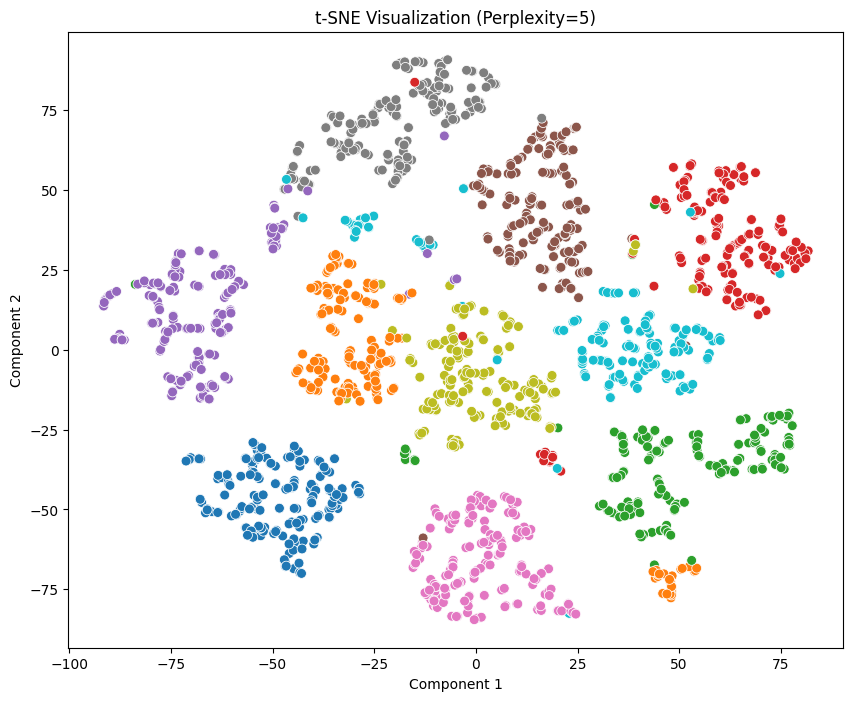

/home/astane/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


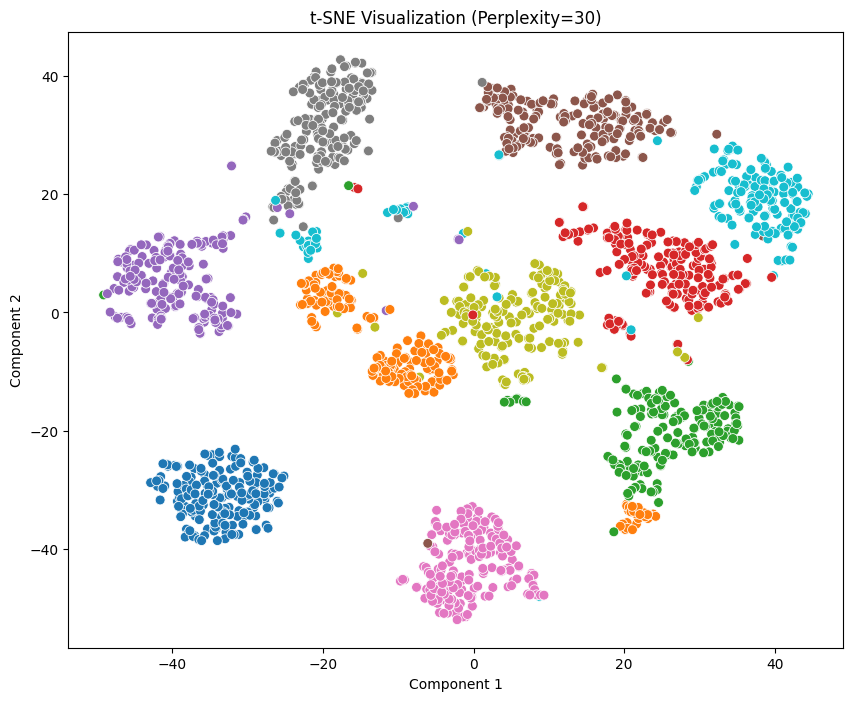

/home/astane/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


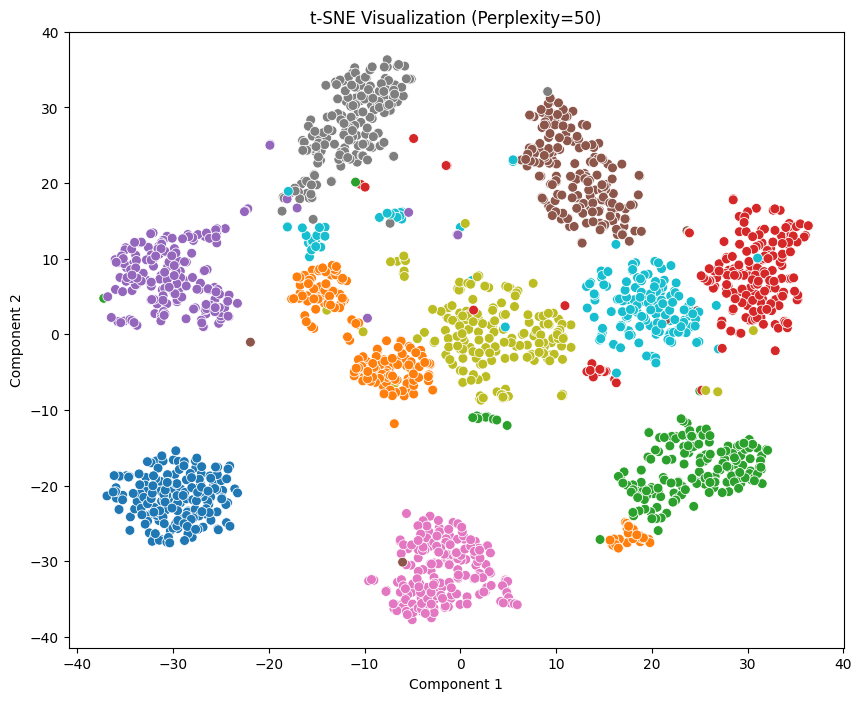

In [9]:
# Experiment with different perplexity values
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)

    # Plot the t-SNE output
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", s=50, legend=None
    )
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

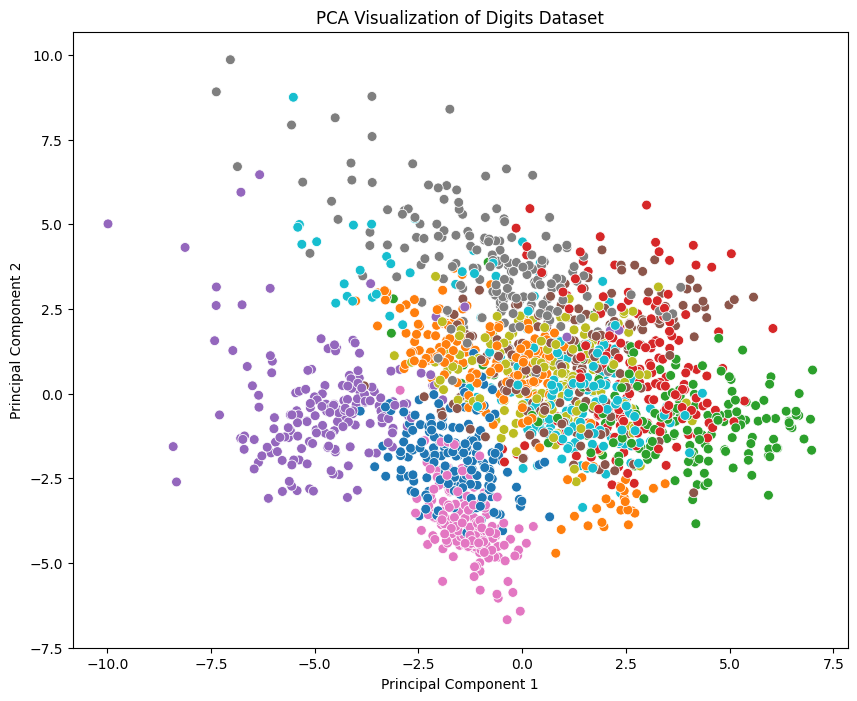

In [10]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA output
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", s=50, legend=None
)
plt.title("PCA Visualization of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

```markdown
The code that would fit at $PLACEHOLDER$ without ``` is:

1. Concepts  
**Dimensionality Reduction**  
Dimensionality reduction is the process of reducing the number of features (dimensions) in a dataset while retaining as much information as possible.  
High-dimensional data is often difficult to visualize and interpret, so techniques like t-SNE are used to project the data into 2D or 3D for visualization.  

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
t-SNE is a non-linear dimensionality reduction technique that is particularly effective for visualizing high-dimensional data.  
It focuses on preserving the local structure of the data, meaning that points that are close in high-dimensional space remain close in the lower-dimensional representation.  

2. Methods  
**Steps in t-SNE**  
- **Pairwise Similarities**:  
    In high-dimensional space, t-SNE calculates the probability of similarity between points based on a Gaussian distribution.  
    In low-dimensional space, it calculates the similarity using a Student's t-distribution.  
- **Minimizing Divergence**:  
    t-SNE minimizes the Kullback-Leibler (KL) divergence between the two distributions (high-dimensional and low-dimensional).  
    This ensures that the local structure of the data is preserved.  
- **Optimization**:  
    The algorithm uses gradient descent to iteratively adjust the positions of points in the low-dimensional space.  

3. Algorithms  
**t-SNE Algorithm**  
- **Compute Pairwise Similarities**:  
    For each point, compute the probability of similarity with every other point in high-dimensional space.  
    Use a Gaussian kernel with a parameter called perplexity to control the balance between local and global structure.  
- **Project to Low Dimensions**:  
    Initialize points randomly in the low-dimensional space.  
    Compute pairwise similarities in the low-dimensional space using a Student's t-distribution.  
- **Optimize Positions**:  
    Minimize the KL divergence between the high-dimensional and low-dimensional distributions using gradient descent.  

4. Results and Plots  
**a. Scatter Plot of t-SNE Output**  
- **What It Shows**:  
    A 2D scatter plot of the high-dimensional data projected into two dimensions using t-SNE.  
    Each point represents a data sample, and points with similar features are grouped together.  
- **How to Interpret**:  
    Clusters in the plot indicate groups of similar data points.  
    Points that are far apart in the plot are dissimilar in the original high-dimensional space.  

**b. Experimenting with Perplexity**  
- **What It Shows**:  
    The effect of the perplexity parameter on the t-SNE visualization.  
    Perplexity controls the balance between local and global structure in the data.  
- **How to Interpret**:  
    Low perplexity values focus on local relationships, while high perplexity values capture more global structure.  
    Experimenting with different values helps find the best representation for the data.  

**c. Comparison with PCA**  
- **What It Shows**:  
    A scatter plot of the data projected into 2D using PCA (Principal Component Analysis).  
    PCA is a linear dimensionality reduction technique that preserves global structure.  
- **How to Interpret**:  
    PCA often produces less distinct clusters compared to t-SNE because it focuses on maximizing variance rather than preserving local relationships.  

5. Example Workflow in the Notebook  
- **Step 1: Load Dataset**  
    Load a high-dimensional dataset, such as the Digits Dataset or any other dataset with multiple features.  
    Display basic information about the dataset, such as its shape and number of classes.  
- **Step 2: Preprocess Data**  
    Standardize the data using `StandardScaler` to ensure all features are on the same scale.  
- **Step 3: Apply t-SNE**  
    Use the `TSNE` class from `sklearn.manifold` to reduce the dimensionality of the dataset to 2D.  
    Experiment with different values of `perplexity` and `n_iter` to observe their effects on the visualization.  
- **Step 4: Visualize Results**  
    Create a scatter plot of the t-SNE output, coloring the points by their class labels.  
    Optionally, compare the t-SNE visualization with PCA to highlight the differences.  

6. Key Insights  
- t-SNE is highly effective for visualizing high-dimensional data in 2D or 3D.  
- It preserves local relationships, making it ideal for identifying clusters in the data.  
- The perplexity parameter significantly affects the visualization and should be tuned for the dataset.  
- Comparing t-SNE with PCA highlights the advantages of non-linear dimensionality reduction.  
```

